# For comparisons to old model

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import copy

from methods.SolutionClass2 import SolutionClass, _find_limits
from methods.save_load_data2 import save_data, load_data
from methods.make_input import make_plasma_input

#### For plotting

In [22]:
def plot_compare(solutions: list, 
                 data_to_plot: list, 
                 ti=[-1], 
                 labels = None,
                 xrange = None,
                 title=None):
    if labels == None: labels = data_to_plot

    ncols = len(ti)
    nrows = len(data_to_plot)
    fig, axes = plt.subplots(nrows, ncols, figsize=(8, 2*nrows), sharex=True, sharey='row')
    normalize = False

    for sol in solutions:
        data_full = sol.get_data_full()
        x         = data_full["x"]
        for i, Ti in enumerate(ti):
            for data_key, ax, label in zip(data_to_plot, axes, labels):
                data_single = data_full[data_key][Ti,:]
                
                if normalize: data_single /= data_full["norm_" + data_key][Ti]

                ax[i].plot(x[1:-2], data_single[1:-2])
                ax[i].set_ylabel(label)
                ax[i].grid(True)
                ax[i].set_xlim(xrange)

            t_view = solutions[0].get_data_full()["t"][Ti]
            axes[0][i].set_title(f"t = {t_view:.5f}\n" + axes[0][i].get_title())
    
    axes[0][0].legend(["new", "old"])
    fig.suptitle(title)
    fig.tight_layout(pad=0.2)

## Normal, step

In [23]:
params = make_plasma_input()
x_len = (params["grid"]["x"][1]-params["grid"]["x"][0])
params["init"]["type"] = "soft-step"
params["init"]["alpha"] = 0.2
params["init"]["x_a"] = 0.0
params["init"]["n_l"] = 1
params["init"]["n_r"] = 0.2
params["init"]["t_l"] = 1
params["init"]["t_r"] = 0.2 #0.2
params["grid"]["Nx"]= 300
params["output"]["maxout"] = 400
params["output"]["tend"] = 5e-2 #1e-4 to 1e-2
params["timestepper"]["type"] = "ARK"
params["timestepper"]["tableau"]  = "ARK-4-2-3"
params["poisson"]["eps"]= 1e-12
params["poisson"]["type"] = "bicgstab"
params["physical"]["tau"] = 1
params["physical"]["type"] = "original"
params["advection"] = {"type" : "staggered", "variant" : "slope-limiter-explicit"}
params["timestepper"]["rtol"] = 1e-5

sol_new = SolutionClass(params)
params["physical"]["mu"] *= -1  # Have to invert the value of mu?!
sol_old = SolutionClass(params, two_fluid_file="../plasma")  # Runs with the old non-temperature system

sols1 = [sol_new, sol_old]

Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero


- Densities don't have time to change so they are omitted

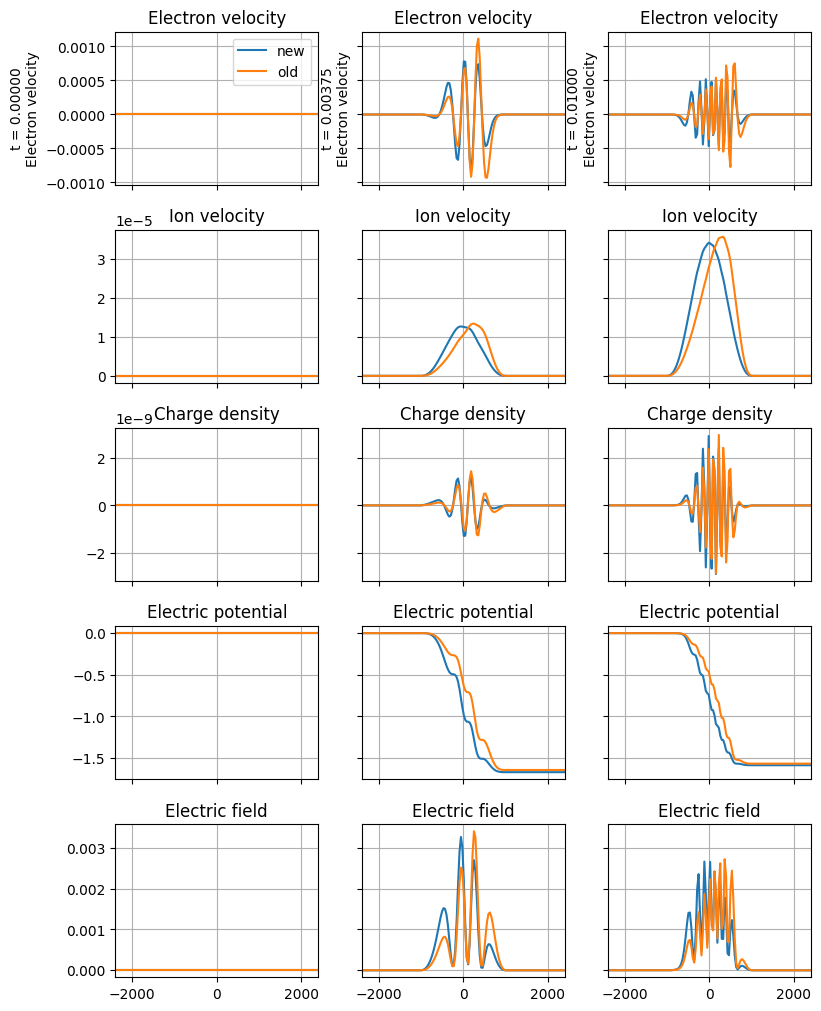

In [24]:
data_to_plot = ["ue", "ui", "charge", "potential", "electric"]
labels = ["Electron velocity", "Ion velocity", "Charge density", "Electric potential", "Electric field"]
plot_compare(sols1, data_to_plot, ti=[0, 30, 80], labels=labels, xrange=(-2400, 2400), title = "")

## Normal, wave

In [5]:
params = make_plasma_input()
x_len = (params["grid"]["x"][1]-params["grid"]["x"][0])
params["init"]["type"] = "wave"
params["init"]["amp"] = 0.01
params["init"]["n_0"] = 1
params["init"]["t_0"] = 1
params["init"]["k"] = 6*np.pi/x_len
params["init"]["x_0"] = 0
params["grid"]["Nx"]= 600
params["output"]["maxout"] = 400
params["output"]["tend"] = 5e-2
params["timestepper"]["type"] = "ARK"
params["timestepper"]["tableau"]  = "ARK-4-2-3"
params["poisson"]["eps"]= 1e-12
params["poisson"]["type"] = "bicgstab"
params["physical"]["tau"] = 1
params["physical"]["type"] = "original"
params["advection"] = {"type" : "staggered", "variant" : "slope-limiter-explicit"}
params["timestepper"]["rtol"] = 1e-5

if 'sols2' not in locals():
    sol_new = SolutionClass(params)
    params["physical"]["mu"] *= -1  # Have to invert the value of mu?!
    sol_old = SolutionClass(params, two_fluid_file="../plasma")  # Runs with the old non-temperature system

    sols2 = [sol_new, sol_old]

Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero


- Oscillations are difficult to represent in plots

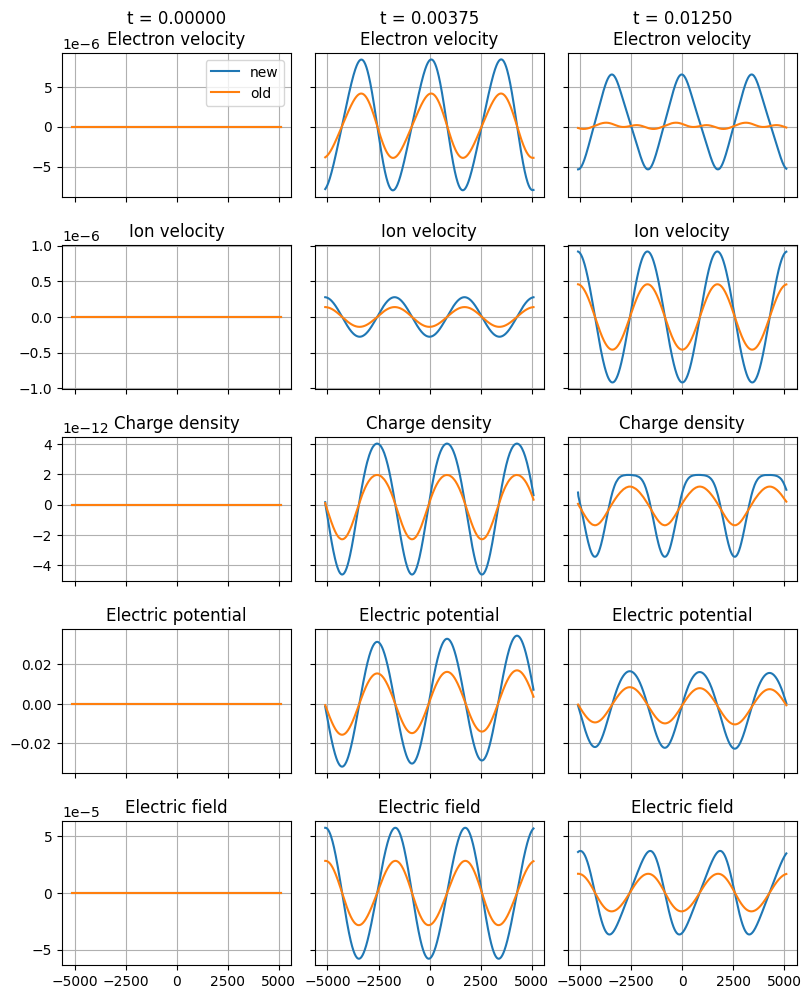

In [6]:
data_to_plot = ["ne", "ue", "ni", "ui", "charge", "potential", "electric"]
labels = ["Electron density", "Electron velocity", "Ion density", "Ion velocity", "Charge density", "Electric potential", "Electric field"]

data_to_plot = ["ue", "ui", "charge", "potential", "electric"]
labels = ["Electron velocity", "Ion velocity", "Charge density", "Electric potential", "Electric field"]
plot_compare(sols2, data_to_plot, ti=[0, 30, 100], labels=labels)

## Adiabatic, step

In [7]:
params = make_plasma_input()
x_len = (params["grid"]["x"][1]-params["grid"]["x"][0])
params["init"]["type"] = "soft-step"
params["init"]["alpha"] = 0.04
params["init"]["x_a"] = 0.0
params["init"]["n_l"] = 1
params["init"]["n_r"] = 0.2
params["init"]["t_l"] = 1
params["init"]["t_r"] = 1
params["grid"]["Nx"]= 600
params["output"]["tend"] = 1.25e3
params["output"]["maxout"] = 300
params["timestepper"]["type"] = "ARK"
params["timestepper"]["tableau"]  = "ARK-4-2-3"
params["poisson"]["eps"]= 1e-12
params["poisson"]["type"] = "anderson"
params["poisson"]["damping"] = 1e-1
params["physical"]["type"] = "adiabatic"
params["physical"]["tau"] = 1
params["physical"]["resistivity"] = 0.0

if 'sols_adiabatic1' not in locals():
    sol_new = SolutionClass(params)
    params["physical"]["mu"] *= -1  # Have to invert the value of mu?!
    sol_old = SolutionClass(params, two_fluid_file="../plasma")  # Runs with the old non-temperature system

    sols_adiabatic1 = [sol_new, sol_old]

Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero


- Electron velocity constant 0 for adiabatic

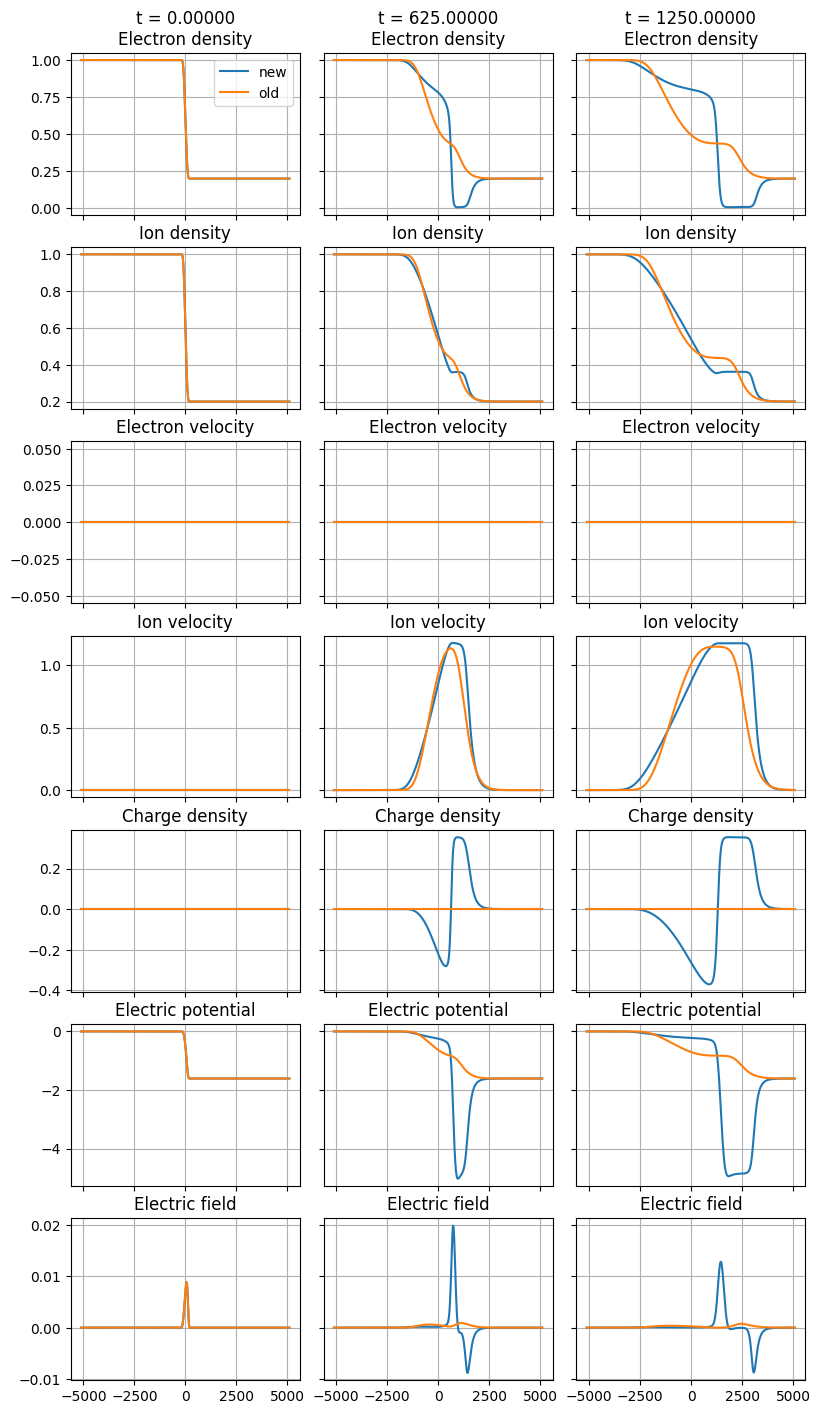

In [16]:
data_to_plot = ["ne", "ni", "ui", "charge", "potential", "electric"]
labels = ["Electron density", "Ion density", "Ion velocity", "Charge density", "Electric potential", "Electric field"]

data_to_plot = ["ne", "ni", "ue", "ui", "charge", "potential", "electric"]
labels = ["Electron density", "Ion density", "Ion velocity", "Charge density", "Electric potential", "Electric field"]
plot_compare(sols_adiabatic1, data_to_plot, ti=[0, 150, 300], labels=labels)

## adiabatic, wave

In [9]:
params = make_plasma_input()
x_len = (params["grid"]["x"][1]-params["grid"]["x"][0])
params["init"]["type"] = "wave"
params["init"]["amp"] = 0.01
params["init"]["n_0"] = 1
params["init"]["t_0"] = 1
params["init"]["k"] = 6*np.pi/x_len
params["init"]["x_0"] = 0
params["grid"]["Nx"]= 600
params["output"]["maxout"] = 300
params["output"]["tend"] = 1.25e3
params["timestepper"]["type"] = "ARK"
params["timestepper"]["tableau"]  = "ARK-4-2-3"
params["poisson"]["eps"]= 1e-12
params["poisson"]["type"] = "anderson"
params["poisson"]["damping"] = 1e-1
params["physical"]["tau"] = 1
params["physical"]["type"] = "adiabatic"
params["physical"]["resistivity"] = 0.0

if 'sols_adiabatic2' not in locals():
    sol_new = SolutionClass(params)
    params["physical"]["mu"] *= -1  # Have to invert the value of mu?!
    sol_old = SolutionClass(params, two_fluid_file="../plasma")  # Runs with the old non-temperature system

    sols_adiabatic2 = [sol_new, sol_old]

Error: No temperature fields found. Setting to zero
Error: No temperature fields found. Setting to zero


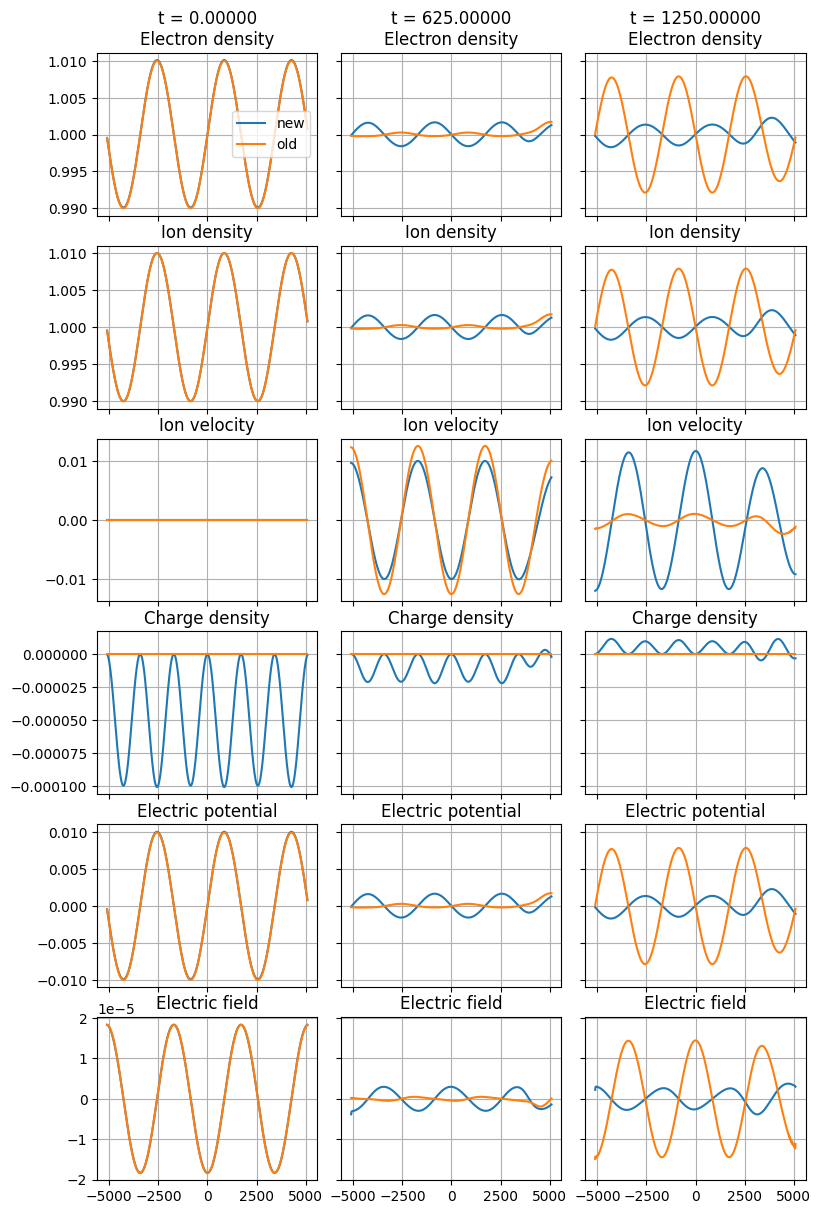

In [10]:
data_to_plot = ["ne", "ni", "ui", "charge", "potential", "electric"]
labels = ["Electron density", "Ion density", "Ion velocity", "Charge density", "Electric potential", "Electric field"]
plot_compare(sols_adiabatic2, data_to_plot, ti=[0, 150, 300], labels=labels)